In [1]:
using CSV, DataFrames, Polynomials, Plots, Printf

In [2]:
function calc_coeff(df::DataFrame,
    x_col::Symbol, y_col::Symbol, order::Int)

  # Extract x and y values
  xs = df[!, x_col]
  ys = df[!, y_col]

  order_text = Dict(1 => "Linear",
    2 => "Quadratic", 3 => "Cubic")
  coeff_text = Dict(1 => "(a, b)",
    2 => "(a, b, c)", 3 => "(a, b, c, d)")

  # Perform polynomial fitting
  # Reverse coefficients to match output
  # Format coefficients
  pf = fit(xs, ys, order)
  cfs_r = reverse(coeffs(pf))
  cfs_fmt = [round(c, digits=2) for c in cfs_r]

  # Using string interpolation to print the result
  println("Curve type for $y_col: ",
    order_text[order])
  println("Coefficients ",
    "$(coeff_text[order]):\n\t$cfs_fmt\n")
end

calc_coeff (generic function with 1 method)

In [3]:
function calc_coeffs(df::DataFrame)
  # Call the function for only ys3 column
  # with respective order
  println("Using Polynomials.fit\n")

  calc_coeff(df, :xs, :ys3, 1)
  calc_coeff(df, :xs, :ys3, 2)
  calc_coeff(df, :xs, :ys3, 3)
end

calc_coeffs (generic function with 1 method)

In [4]:
function calc_plot_all(df::DataFrame,
    x_col::Symbol, y_col::Symbol)

  # Extract x and y values
  xs = df[!, x_col]
  ys = df[!, y_col]

  # Draw Plot
  xp = range(minimum(xs), maximum(xs), length=100)
  yp1 = fit(xs, ys, 1).(xp)
  yp2 = fit(xs, ys, 2).(xp)
  yp3 = fit(xs, ys, 3).(xp)

  # Plotting
  scatter(xs, ys,
    label="Data Points")
  plot!(xp, yp1, color=:red,
    label="Linear Equation")
  plot!(xp, yp2, color=:green,
    label="Fitted second-order polynomial")
  plot!(xp, yp3, color=:blue,
    label="Fitted third-order polynomial")

  # Decoration
  xlabel!("X values")
  ylabel!("Y values")
  title!("Polynomial Curve Fitting")
end

calc_plot_all (generic function with 1 method)

In [5]:
# Read data from CSV file
# Strip spaces from column names
df = CSV.read("series.csv", DataFrame)
rename!(df, Symbol.(strip.(string.(names(df)))))

Row,xs,ys1,ys2,ys3
,Int64,Int64,Int64,Int64
1,0,5,5,5
2,1,9,12,14
3,2,13,25,41
4,3,17,44,98
5,4,21,69,197
6,5,25,100,350
7,6,29,137,569
8,7,33,180,866
9,8,37,229,1253


In [6]:
calc_coeffs(df)

Using Polynomials.fit

Curve type for ys3: Linear
Coefficients (a, b):
	[306.0, -721.0]

Curve type for ys3: Quadratic
Coefficients (a, b, c):
	[39.0, -162.0, 137.0]

Curve type for ys3: Cubic
Coefficients (a, b, c, d):
	[2.0, 3.0, 4.0, 5.0]



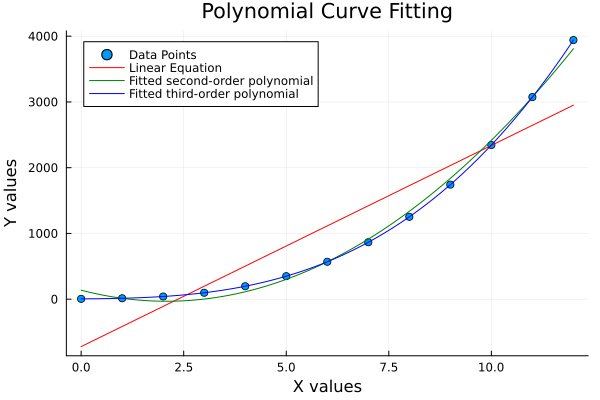

In [7]:
# Plot all three series
calc_plot_all(df, :xs, :ys3)